## Finall Project

Thông tin nhóm: 

|Mã số sinh viên|Họ và Tên|
|---|---|
|20127514|Trần Thị Bảo Hương|

## Collecting data

Dữ liệu của bạn về chủ đề gì? Nguồn dữ liệu? 

- Dữ liệu này có chủ đề về nguồn nước.
- Dữ liệu được là từ: [Kaggle](https://www.kaggle.com/dataset)
- Source dữ liệu : [link](https://www.kaggle.com/datasets/adityakadiwal/water-potability)

Tác giả của dữ liệu này có cho phép bạn sử dụng như thế này không? Bạn có thể kiểm tra giấy phép dữ liệu
- Đây là dữ liệu được public

Tác giả đã thu thập dữ liệu như thế nào?
 - Dữ liệu được tạo ra bằng cách tổng hợp

## Exploring data

Môi trường thực hiện:

In [1]:
import sys
sys.executable

'C:\\Users\\nagin\\miniconda3\\envs\\min_ds-env\\python.exe'

### Khai báo các thư viện được sử dụng

In [2]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

### Đọc dữ liệu

In [3]:
data_df = pd.read_csv('water_potability.csv')
data_df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


### Số dòng và số cột 

In [4]:
n_row = len(data_df)
n_col = len(data_df.columns)
print ('Số dòng của dữ liệu: ', n_row, '\nSố cột của dữ liệu', n_col)

Số dòng của dữ liệu:  3276 
Số cột của dữ liệu 10


### Ý nghĩa của mỗi dòng 

Mỗi dòng là số liệu của một mẫu nước, bao gồm: độ ph, độ cứng, số lượng chất rắn hòa tan, Chloramines, Sulfate, độ dẫn điện, lượng cacbon, Trihalomethanes,	độ đục và khả năng uống của mẫu nước

### Có hàng nào bị trùng hay không?

In [5]:
data_df.duplicated().all()

False

Không có hàng nào bị trùng cả

### Ý nghĩa các cột 

|Cột tên|Cột trung bình|
|------------|--------|
|ph| pH của 1. nước (0 đến 14)|
|Hardness| Dung tích nước để kết tủa xà phòng tính bằng mg/L|
|Solids| Tổng chất rắn hòa tan tính bằng ppm|
|Chloramine| Lượng Chloramine trong pp|
|Sulfat| Lượng Sulfate hòa tan theo mg/L|
|Conductivity| Độ dẫn điện của nước tính bằng μS/cm|
|Organic_carbon| Lượng carbon hữu cơ tính bằng ppm|
|Trihalomethanes| Lượng Trihalomethanes tính bằng μg/L|
|Turbidity| Đo đặc tính phát sáng của nước trong NTU|
|Potability| Cho biết nước có an toàn cho người tiêu dùng hay không. Uống được: 1 và Không uống được: 0|

Các cột sẽ biểu diễn cho các thông số, đề hiểu rõ giá trị của mỗi cột đó là gì, và nó đại điện cho điều gì? 

Xem bản sau:

|Tên cột | Mô tả|
|---|----------------|
|pH giá trị|pH là thông số quan trọng trong việc đánh giá cân bằng axit-bazơ của nước. Nó cũng là chỉ số về tình trạng axit hoặc kiềm của trạng thái nước. WHO đã khuyến cáo giới hạn tối đa cho phép của pH từ 6,5 đến 8,5.|
|Độ cứng|Độ cứng chủ yếu do muối canxi và magie gây ra. Những muối này được hòa tan từ các trầm tích địa chất mà qua đó nước di chuyển. Khoảng thời gian nước tiếp xúc với vật liệu tạo độ cứng giúp xác định độ cứng có trong nước thô. Độ cứng ban đầu được định nghĩa là khả năng kết tủa xà phòng của nước do Canxi và Magiê |
|Chất rắn (Tổng chất rắn hòa tan - TDS)|Nước có khả năng hòa tan nhiều loại khoáng chất vô cơ và hữu cơ hoặc muối như kali, canxi, natri, bicacbonat, clorua, magiê, sunfat, v.v. hương vị và màu sắc pha loãng khi xuất hiện của nước. Đây là thông số quan trọng cho việc sử dụng nước. Nước có giá trị TDS cao chứng tỏ nước có nhiều khoáng chất. Giới hạn mong muốn cho TDS là 500 mg/l và giới hạn tối đa là 1000 mg/l được quy định cho mục đích uống|
|Chloramines|Clo và chloramine là những chất khử trùng chính được sử dụng trong hệ thống nước công cộng. Chloramine thường được hình thành khi thêm amoniac vào clo để xử lý nước uống. Nồng độ clo lên tới 4 miligam trên lít (mg/L hoặc 4 phần triệu (ppm)) được coi là an toàn trong nước uống|
|Sulfate|Sulfate là những chất tự nhiên được tìm thấy trong khoáng chất, đất và đá. Chúng hiện diện trong không khí xung quanh, nước ngầm, thực vật và thực phẩm. Việc sử dụng thương mại chính của sulfat là trong ngành hóa chất. Nồng độ sunfat trong nước biển là khoảng 2.700 miligam trên lít (mg/L). Nó nằm trong khoảng từ 3 đến 30 mg/L ở hầu hết các nguồn cung cấp nước ngọt, mặc dù nồng độ cao hơn nhiều (1000 mg/L) được tìm thấy ở một số vị trí địa lý|
|Độ dẫn điện|Nước tinh khiết không phải là chất dẫn điện tốt mà là chất cách điện tốt. Tăng nồng độ ion giúp tăng cường tính dẫn điện của nước. Nói chung, lượng chất rắn hòa tan trong nước quyết định độ dẫn điện. Độ dẫn điện (EC) thực sự đo lường quá trình ion của một dung dịch cho phép nó truyền dòng điện. Theo tiêu chuẩn của WHO, giá trị EC không được vượt quá 400 μS/cm|
|Organic_carbon|Tổng lượng Carbon hữu cơ (TOC) trong nguồn nước đến từ chất hữu cơ tự nhiên đang phân hủy (NOM) cũng như các nguồn tổng hợp. TOC là thước đo tổng lượng carbon trong các hợp chất hữu cơ trong nước tinh khiết. Theo US EPA < 2 mg/L as TOC trong nước đã qua xử lý/nước uống, và < 4 mg/Lít trong nước nguồn được sử dụng để xử lý|
|Trihalomethanes|THMs là những hóa chất có thể được tìm thấy trong nước được xử lý bằng clo. Nồng độ THMs trong nước uống thay đổi tùy theo mức độ chất hữu cơ trong nước, lượng clo cần thiết để xử lý nước và nhiệt độ của nước đang được xử lý. Mức THM lên đến 80 ppm được coi là an toàn trong nước uống|
|Độ đục|Độ đục của nước phụ thuộc vào lượng chất rắn có trong trạng thái lơ lửng. Nó là thước đo các đặc tính phát sáng của nước và phép thử được sử dụng để chỉ ra chất lượng xả thải đối với chất keo. Giá trị độ đục trung bình thu được cho Wondo Genet Campus (0,98 NTU) thấp hơn giá trị khuyến nghị của WHO là 5,00 NTU|
|Khả năng uống được|Cho biết liệu nước có an toàn cho con người sử dụng hay không trong đó 1 có nghĩa là Uống được và 0 có nghĩa là Không uống được|

### Kiểu dữ liệu hiện tại của các cột? 

In [6]:
data_df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

- Nhận xét Sau khi tìm hiểu về các giá trị của mỗi cột nhận thấy rằng dữ liệu trên là phù hợp.

#### Giá trị đối với mỗi thuộc tính được phân phối như thế nào

Phần trăm giá trị bị thiếu ở mỗi cột


In [7]:
data_df.isnull().sum(axis=0)/n_row*100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

Giá trị lớn nhất, giá trị nhỏ nhất đối với mỗi cột

In [8]:
pd.DataFrame([data_df.max(axis=0),data_df.min(axis=0)], index=['max', 'min'])


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
max,14.0,323.124,61227.196008,13.127,481.030642,753.342620,28.3,124.000,6.739,1.0
min,0.0,47.432,320.942611,0.352,129.000000,181.483754,2.2,0.738,1.450,0.0


- Nhận xét: Các giá trị không có điểm bất thường

Xem các giá trị thống kê của mỗi thuộc tinh(cột)

In [9]:
data_df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


- Nhận xét: Dựa và giá trị trung bình và trung vị ta có thể thấy được phần lớn các thuộc tính có phân bố lệch dương

## Câu hỏi được đặt ra:

### Những mẫu nước được xem là uống được trong tập dữ liệu (Potability = 1) có bao nhiêu mẫu an toàn. 
- Nước đối với mỗi chúng ta là thức được cơ thể hấp thụ hằng ngày, chúng ta luôn nghe đến việc uống ít nhất 2 lít nước một ngày.
- Mặt khác hơn 70% cơ thể chúng ta là nước điều này cho thấy nước có một vai trò quan trọng và có một sự ảnh hưởng đến sức khỏe của con người. Đo đó khi chúng ta cung cấp cho cơ thể một nguồn nước "sạch" thì cơ thể ta phần này sẽ ảnh hưởng đến cơ thể ta một hướng tích cực và ngược lai.

### Khi đọc tìm hiều về các thuộc tính thấy được độ dẫn điện được quyết định bởi chất lượng hòa tan của chất rắn. Vậy thì tổng số lượng hòa tan chất rắn và độ dẫn điện sẽ có ảnh hưởng nhất định nào không. Chúng có quan hệ nào không, liệu quan hệ đó có giúp chúng ta tính toán thuộc tính này đựa trên thuộc tính kia hay không?
- Trả lời câu hỏi này sẽ là rõ được vấn đề chất lượng hòa tan và số chất hòa tan có ảnh hưởng đến nhau hay không. 
- Nếu chúng bị ảnh hưởng lẫn này ta có thế loại bớt 1 thuộc tính để giảm chiều dữ liệu. Điều này sẽ giúp khi học các mô hình học máy, phân lớp tỉ lệ chính xác cao hơn.

### Độ đục của nước là một trong những chỉ số chúng ta có thế nhìn thấy trực tiếp. Vậy đối với các thuộc tính như: TDS, clo, sulfate, cảbon, tri.... có thể dự đoán được độ đục của nước hay không? Nếu dự đoán được thì mô hình bạn dự đoán sẽ có độ chính xác là bao nhiêu? 
- Trên thực thế không dễ dàng để nhận định được nguồn nước đó, mẫu nước đó có an toàn cho sức khỏe con người, có phù hợp để dùng vào sinh hoạt hay không. Việc nhận biết mức độ an toàn thông qua độ đục sẽ mang tính tương đối và dễ dàng hơn trong thực tế. 
- Khi trả lời câu hỏi này ta có thể dự đoán được những yếu tố ảnh hưởng đến độ đục và từ đó dễ dàng nhận biết bằng mắt. nguồn nước như thế nào thì sẽ thích hợp vào việc sử dụng sinh hoạt

### Trong nông ngiệp nguồn nước sẽ ảnh hưởng đến chất lượng nông sản. Đối với những nông sản có nguồn nước tốt, phù hợp thì nông sản sẽ có giá trị dinh dưỡng cao hơn, đồng thời không hấp thụ các tạp chất không an toàn làm cho việc nông sản bị biến chất. Vậy những nguồn nước phù hợp cho việc trồng trọt sẽ chiếm bao nhiêu mẫu trong dữ liệu.    
- Nước đối với nông nghiệp ảnh hưởng quan trọng, với những nguồn nước bị ô nhiềm thì các thực phẩm được trồng trọt, tưới tắm từ nguồn nước đó cũng ảnh hưởng khá lớn. Việc yêu cầu thực phẩm sạch ngày nay càng được quan tâm nên khi chú trọng tới nguồn nước sẽ giúp cho những thực phẩm đó sạch sẽ, có năng suất hơn. 
- Trả lời câu hỏi sẽ giúp ta thấy bộ dữ liệu này liệu có bao nhiêu phần trăm phù hợp để phát triển nông nghiệp. Những yếu tố ảnh hưởng đến việc trồng trọt mà do nước quyết định.
- Đồng thời ta sẽ xem xét được có phải những mẫu nước có khả năng uống điều trồng trọt được hay không. 

## Preprocessing + analyzing data to answer each question

Trước khi trả lời các câu hỏi ta tiến hành điền các giá trị thiếu. 


### Fill in the missing value
Nhận thấy ở cột ph, Sulfate, và Trihalomethanes có các giá trị thiếu. tiến hành điền các giái trị thiếu là KNN để có các mẫu giá trị gần đúng nhất

In [10]:
impute =  KNNImputer(n_neighbors = 10, weights = "uniform")
imputed = impute.fit_transform(data_df)
data_filled = pd.DataFrame(imputed,columns = data_df.columns)
data_filled.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.079837,196.369496,22014.092526,7.122277,333.624427,426.205111,14.284970,66.430278,3.966786,0.390110
std,1.484111,32.879761,8768.570828,1.583085,36.878289,80.824064,3.308162,15.804503,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.254505,176.850538,15666.690297,6.127421,313.808921,365.734414,12.065801,56.524092,3.439711,0.000000
50%,7.034555,196.967627,20927.833607,7.130299,333.254489,421.884968,14.218338,66.671617,3.955028,0.000000
75%,7.913438,216.667456,27332.762127,8.114887,352.960380,481.792304,16.557652,76.749604,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


### Trực quan hóa

array([[<AxesSubplot:title={'center':'ph'}>,
        <AxesSubplot:title={'center':'Hardness'}>,
        <AxesSubplot:title={'center':'Solids'}>],
       [<AxesSubplot:title={'center':'Chloramines'}>,
        <AxesSubplot:title={'center':'Sulfate'}>,
        <AxesSubplot:title={'center':'Conductivity'}>],
       [<AxesSubplot:title={'center':'Organic_carbon'}>,
        <AxesSubplot:title={'center':'Trihalomethanes'}>,
        <AxesSubplot:title={'center':'Turbidity'}>],
       [<AxesSubplot:title={'center':'Potability'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

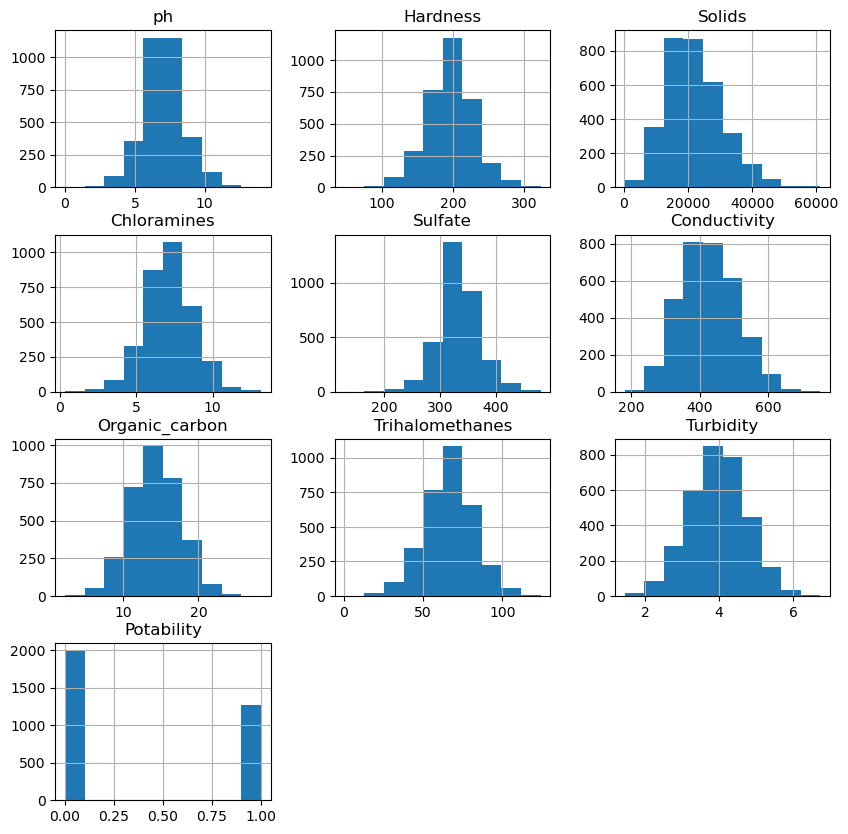

In [11]:
data_filled.hist(figsize = (10,10))

### Câu hỏi 1: Những mẫu nước được xem là uống được trong tập dữ liệu (Potability = 1) có bao nhiêu mẫu an toàn. 

Các mẫu nước uống được:

In [12]:
dataSafe = data_filled[data_filled['Potability']==1]
dataSafe.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.0
mean,7.075470,195.800744,22383.991018,7.169338,332.795124,425.383800,14.160893,66.602019,3.968328,1.0
std,1.358711,35.547041,9101.010208,1.702988,42.499779,82.048446,3.263907,16.006720,0.780842,0.0
min,0.227499,47.432000,728.750830,0.352000,129.000000,201.619737,2.200000,8.175876,1.492207,1.0
25%,6.329107,174.330531,15668.985035,6.094134,309.551154,360.939023,12.033897,56.890960,3.430909,1.0
50%,7.037063,196.632907,21199.386614,7.215163,333.304549,420.712729,14.162809,66.717760,3.958576,1.0
75%,7.814692,218.003420,27973.236446,8.199261,356.399723,484.155911,16.356245,77.157936,4.509569,1.0
max,13.175402,323.124000,56488.672413,13.127000,481.030642,695.369528,23.604298,124.000000,6.494249,1.0


Sau khi ta có bảng dữ liệu về những mẫu nước được xem là an toàn ta tiến hành xem "Thế nào là nước an toàn":
- Đối với giá trị pH: thì giá trị dao động từ 6.5 đến 8.5
- Đối với giá trị TDS: nước không được vượt quá 500mg/l đối với nước ăn uống và không vượt quá 1000mg/l đối với nước sinh hoạt.
- Chloramines: nồng độ clo lên tới 4 miligam trên lít (mg/L hoặc 4 phần triệu (ppm)) được coi là an toàn trong nước uống
- Conductivity: Giá trị không vượt quá 400 μS/cm
- Organic_carbon: Giá trị này không vượt quá 4mg/L
- Trihalomethanes: Giá trị lớn hơn 80ppm
- Turbidity: nhỏ hơn 5.00 NTU

Dựa trên các tiêu chí sẽ đánh giá mẫu nước an toàn

Các mẫu nước có độ pH nằm trong khoảng 6.5 đến 8.5

In [13]:
pHsafe = dataSafe[(dataSafe['ph'] <= 8.5) & (dataSafe['ph'] >= 6.5)]
pHsafe

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
252,7.186020,169.974849,23403.637304,8.519730,326.304596,475.573562,12.924107,50.861913,2.747313,1.0
253,6.800119,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,1.0
254,7.174135,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,1.0
255,7.657991,236.960889,14245.789121,6.289065,373.165363,416.624189,10.464239,85.852769,2.437296,1.0
256,8.322987,207.252462,28049.646283,8.827061,297.813085,358.725869,18.709273,60.911420,4.052136,1.0
...,...,...,...,...,...,...,...,...,...,...
3265,8.197353,203.105091,27701.794055,6.472914,328.886838,444.612724,14.250875,62.906205,3.361833,1.0
3266,8.372910,169.087052,14622.745494,7.547984,341.900360,464.525552,11.083027,38.435151,4.906358,1.0
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1.0
3272,7.808856,193.553212,17329.802160,8.061362,341.343026,392.449580,19.903225,62.554876,2.798243,1.0


Các mẫu nước có độ pH nằm trong 6.5 đén 8.5 và có lượng chất rắn nhỏ hơn 1000

In [14]:
temp = pHsafe[pHsafe['Solids'] < 1000]
temp

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability


Ta chỉ lọc với 2 thuộc tính là ph là giá trị TDS thì nhận thấy bảng ko còn giá trị phù hợp nữa

- Nhận xét: Qua đây ta cho rằng đối với tập dữ liệu này đối với mẫu nước uống được không phải là mẫu nước an toàn cho sức khỏe. 

### Câu hỏi 2: Khi đọc bản mô tả thuộc tính thấy được độ dẫn điện được quyết định bởi chất lượng hòa tan của chất rắn. Vậy thì tổng số lượng hòa tan chất rắn và độ dẫn điện sẽ có ảnh hưởng nhất định nào không. Chúng có quan hệ nào không, liệu quan hệ đó có giúp chúng ta tính toán thuộc tính này đựa trên thuộc tính kia hay không?

Trực quan hóa mối quan hệ giữa cột Solids và Conductivity

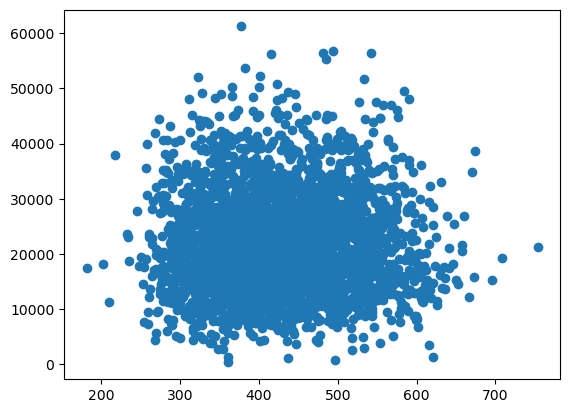

In [15]:
plt.scatter(data_filled['Conductivity'], data_filled['Solids'], cmap='Spectral')

Nhận xét với việc trực quan hóa 2 thuộc tính Solids và Turbidity ta dễ thấy không có mối quan hệ nào xuất hiện giữu EC và TDS. Điều này cho thấy giá trị EC không phụ thuộc hoàn toàn và TDS. 
- Mặt khác TDS là chỉ số chỉ tổng số chất rắn hòa tan. Chất rắn đây có thể là hữu cơ, hoặc vô cơ. 
- Còn đối với EC là độ dẫn điện, chỉ số này có được nếu chất rắn hòa tan đó phân cực tạo ra các ion dương và ion âm thì quá trình dẫn điện mới được hình thành. Đối với các chất rắn hữu cơ thì khả năng tạo ra các ion thấp. Điêu này dễ thấy đối với một số điểm có chỉ số TDS thấp nhưng giá trị EC lại ở mức 6 7 gần như là cao nhất.

### Câu hỏi 3: Độ đục của nước là một trong những chỉ số chúng ta có thế nhìn thấy trực tiếp. Vậy đối với các thuộc tính như: TDS, clo, sulfate, cảbon, tri.... có thể dự đoán được độ đục của nước hay không? Nếu dự đoán được thì mô hình bạn dự đoán sẽ có độ chính xác là bao nhiêu? 


Độ đục được xem là an toàn với giá trị nhỏ hơn 5 NTU. Tiến hành giảm giữa liệu của độ đục về giá trị 0 và 1. 
- Với 0 là giá trị lớn hơn hoặc bằng 5 và ngược lại là bằng 1

In [16]:
df3 = data_filled.copy()
df3['Turbidity_reduce'] = np.array(data_filled['Turbidity'] < 5 , dtype=int)
df3 = df3.drop(['Turbidity'], axis=1)
df3

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Potability,Turbidity_reduce
0,7.417308,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,0.0,1
1,3.716080,129.422921,18630.057858,6.635246,341.794864,592.885359,15.180013,56.329076,0.0,1
2,8.099124,224.236259,19909.541732,9.275884,329.237272,418.606213,16.868637,66.420093,0.0,1
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,0.0,1
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,0.0,1
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,1.0,1
3272,7.808856,193.553212,17329.802160,8.061362,341.343026,392.449580,19.903225,62.554876,1.0,1
3273,9.419510,175.762646,33155.578218,7.350233,335.228216,432.044783,11.039070,69.845400,1.0,1
3274,5.126763,230.603758,11983.869376,6.303357,336.711411,402.883113,11.168946,77.488213,1.0,1


Cột Turbidity_reduce chứa giá trị của độ đục sau khi đưa về 0 và 1

Lấy những thuộc tính được xem là ảnh hưởng đến độ đục bao giồm: TDS, col, sulfate, Organic_carbon và Trihalomethanes bới những thuộc tính này hòa tan trong nước, hoặc là những phần có trong nước

In [17]:
cols= ['Solids','Chloramines','Sulfate','Organic_carbon','Trihalomethanes','Turbidity_reduce']
df3 = df3[cols].copy()
df3

,Solids,Chloramines,Sulfate,Organic_carbon,Trihalomethanes,Turbidity_reduce
0,20791.318981,7.300212,368.516441,10.379783,86.990970,1
1,18630.057858,6.635246,341.794864,15.180013,56.329076,1
2,19909.541732,9.275884,329.237272,16.868637,66.420093,1
3,22018.417441,8.059332,356.886136,18.436524,100.341674,1
4,17978.986339,6.546600,310.135738,11.558279,31.997993,1
...,...,...,...,...,...,...
3271,47580.991603,7.166639,359.948574,13.894419,66.687695,1
3272,17329.802160,8.061362,341.343026,19.903225,62.554876,1
3273,33155.578218,7.350233,335.228216,11.039070,69.845400,1
3274,11983.869376,6.303357,336.711411,11.168946,77.488213,1


Ta tiến hành trực quan dữ liệu xem thử có mối quan hệ nào tồn tại

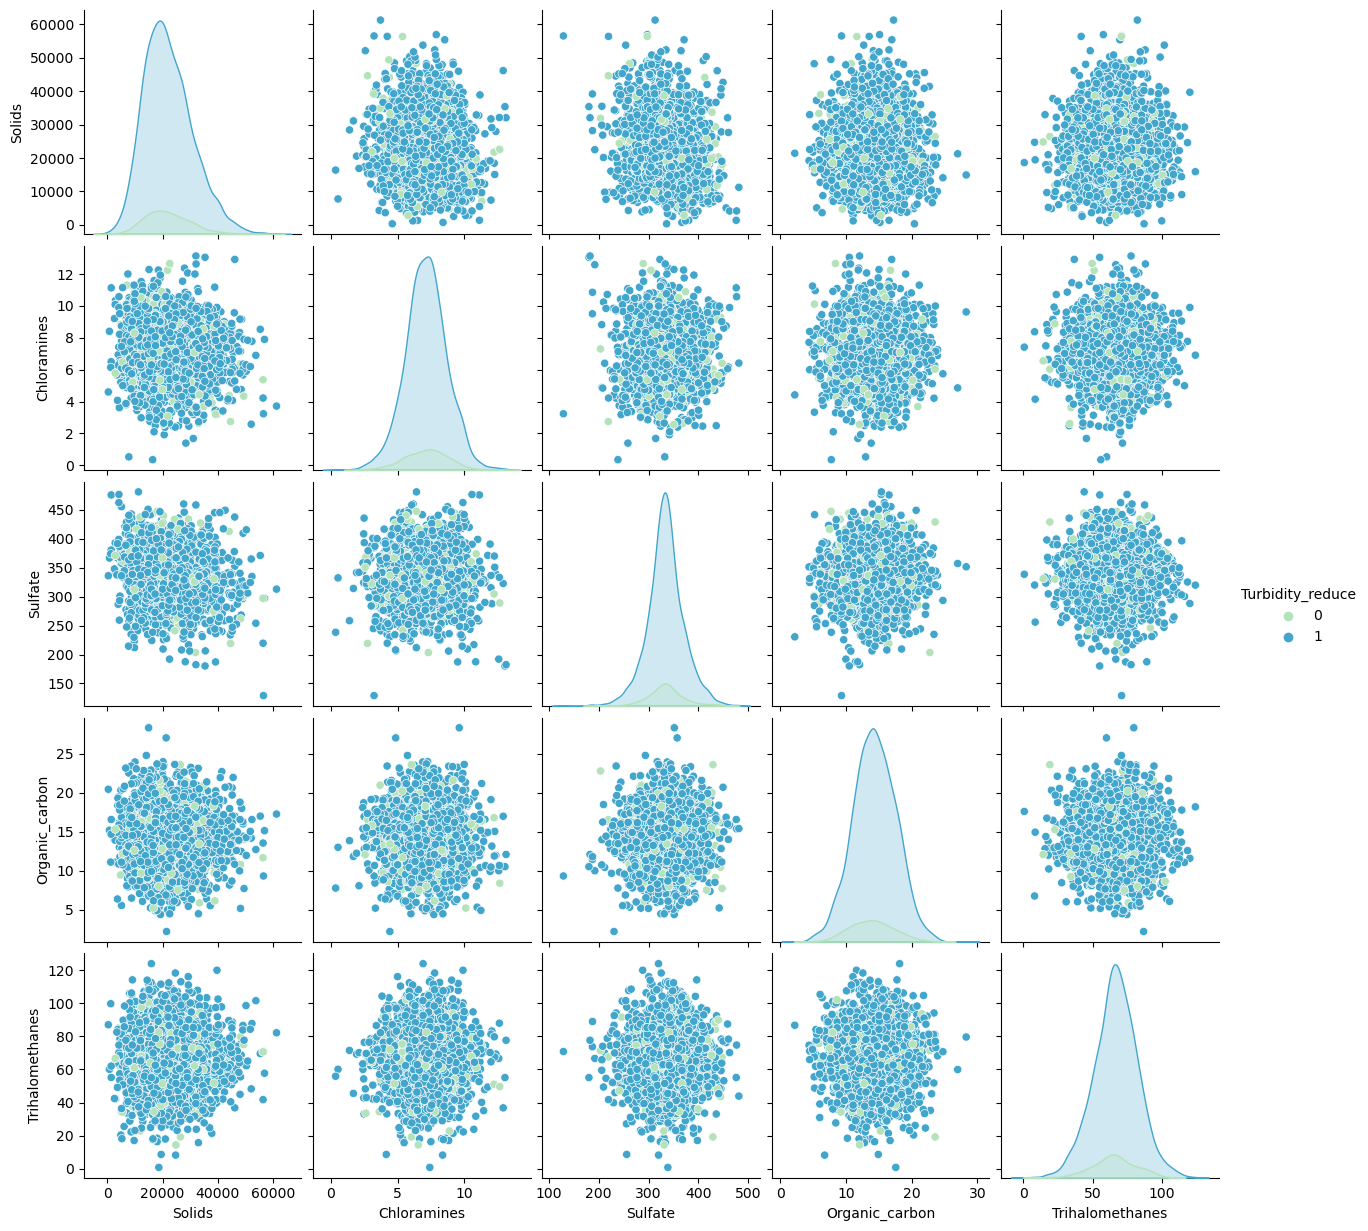

In [18]:
sns.pairplot(data=df3, hue='Turbidity_reduce', palette='GnBu')

Có vẻ như ta có thể mô hình hóa được những thuộc tính trên

Ta tiến hành chia tập dữ liệu thành tập train và valid để mô hình hóa chúng

In [19]:
Y_data = df3['Turbidity_reduce']
X_data = df3.drop('Turbidity_reduce', axis=1)
print(X_data.shape)
print(Y_data.shape)

(3276, 5)
(3276,)


In [20]:
x_train,x_test,y_train,y_test=train_test_split(X_data,Y_data,test_size=0.2,random_state=10)

Xem kích thước tập train và tập test

In [21]:
print (x_train.shape,' ',y_train.shape)
print (x_test.shape,' ',y_test.shape)

(2620, 5)   (2620,)
(656, 5)   (656,)


Thử mô hình hóa bằng LogisticRegression

In [22]:
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression()
regressor.fit(x_train,y_train)

LogisticRegression()

Dự đoán kết quả và xem độ chính xác như thế nào:

In [23]:
y_pred=regressor.predict(x_test)
ac=regressor.score(x_test,y_test) * 100
ac

88.10975609756098

Kết quả trực quan này có vẻ khả quan 

Thử với mô hình MLP xem sao

In [24]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=1000, activation='tanh', solver='sgd',learning_rate='adaptive' , alpha=1, random_state=1 , max_iter=10000)
mlp.fit(x_train, y_train)
mlp.predict(x_train)
mlp.score(x_test,y_test)*100

88.10975609756098

Có lẽ không có nhiều thay đổi lắm. 

Với độ chính xác như thế này có có thể thấy các thông số như: chất rắn, Chloramines, Sulfate, Organic_carbon, Trihalomethanes, Turbidity_reduce gần nhà là ảnh hưởng đến độ đục của nước.

Vì vậy đối với những nguồn nước có độ đục càng cao lại càng ảnh hưởng đến sức khỏe khá nhiều.


Do đó, ta có thể xem xét các độ đục của nước từ đó đánh giá và sử chúng một các tương đối để có thể đảm bảo cho sức khỏe, cho sinh hoạt

### Câu hỏi 4: Trong nông ngiệp nguồn nước sẽ ảnh hưởng đến chất lượng nông sản. Đối với những nông sản có nguồn nước tốt, phù hợp thì nông sản sẽ có giá trị dinh dưỡng cao hơn, đồng thời không hấp thụ các tạp chất không an toàn làm cho việc nông sản bị biến chất. Vậy những nguồn nước phù hợp cho việc trồng trọt sẽ chiếm bao nhiêu mẫu trong dữ liệu.    

Để trả lời được câu hỏi này ta xác định nguồn nước trong việc trong việc trồng trọt

Những đặc điểm được lấy từ tại [link](https://funo.vn/kien-thuc-nong-nghiep/dat-va-nuoc/chat-luong-nuoc-tuoi-dung-trong-nong-nghiep)

Trong đó có 3 giá trị cần quan tâm và ta có thể khai thác trên bộ dữ liệu này là: độ pH, độ dẫn điện và độ cứng. Cùng xem xét giá trị này như thế nào nhé!
- Đối với độ pH: Nước tưới phải có độ pH từ 5.0 -7.0.
- Đối với độ dẫn điện: Nước tưới được thêm phân bón hòa tan có EC chủ yếu khoảng 1.5 - 2.5 mS/cm, do đó, để tránh cây bị tổn thương, nước đầu vào phải có EC không cao hơn phạm vi chấp nhận được là 0 - 1.5 mS/cm, các giá trị nhỏ hơn 1 được khuyến nghị cho cây con.
- Đối với độ cứng: Độ cứng là biểu hiện của lượng canxi và magiê trong nước. Canxi và magie là những nguyên tố cần thiết cho sự phát triển của thực vật. Canxi trong khoảng 40 - 100 ppm và magie trong khoảng 30 - 50 ppm được coi là mong muốn cho nước tưới.

Với các thông số nhưng vậy ta xét các điều kiện như sau:
- 5.0 <= pH <= 70
- Conductivity < 1.5 mS/cm tức là 1500 μS/cm
- 35 < giá trị độ cứng < 75

In [25]:
ph_data = data_filled[(data_filled['ph'] > 5) & (data_filled['ph'] < 7)]
ec_data = data_filled[(data_filled['Conductivity'] < 1500)]
hd_data = data_filled[data_filled['Hardness'] < 150]

In [26]:
df4 = pd.merge(ph_data, hd_data, how='inner') 
df4 = pd.merge(df4, ec_data, how='inner') 
df4

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,5.400302,140.739062,17266.593422,10.056852,328.358241,472.874073,11.256381,56.931906,4.824786,0.0
1,6.425735,143.453731,19942.273218,5.890755,339.014781,427.130671,22.469892,53.124094,2.907564,0.0
2,6.652488,145.010172,19871.788448,4.961066,288.052192,545.974994,10.942024,71.727414,3.742090,0.0
3,5.704765,116.299330,33223.581529,7.050503,297.078153,504.378681,9.001820,48.147031,4.157533,0.0
4,6.217273,130.944464,19460.382819,7.092463,300.131272,556.653710,14.083608,57.897075,5.325833,0.0
...,...,...,...,...,...,...,...,...,...,...
88,6.988206,144.209535,33357.515863,6.771945,344.370069,409.006788,17.880332,54.111785,1.899683,0.0
89,5.264284,142.534126,25556.053128,6.600787,416.262799,443.759231,7.491362,72.879848,5.100240,0.0
90,6.259268,130.374272,9734.677103,10.282329,320.359766,399.350709,10.846787,43.420195,3.932142,1.0
91,5.666446,142.147811,24383.741538,9.989551,320.264283,511.954001,23.604298,77.030487,3.836823,1.0


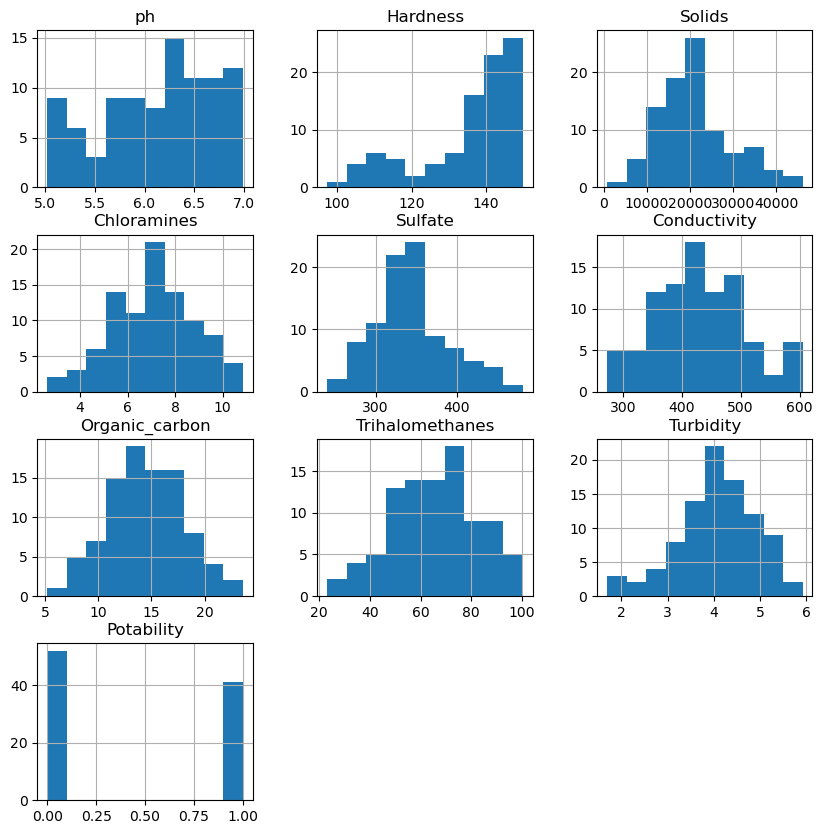

In [27]:
p = df4.hist(figsize = (10,10))

Trong tập dữ liệu này giá trị nước uống được và phù hợp cho trồng trọt sẽ chiếm bao nhiêu phần trăm

In [28]:
len(df4[df4['Potability'] == 1])/len(df4)

0.44086021505376344

- Ta thấy giá trị này khá nhỏ. Điều này cho thấy nước có khả năng uống thì đối với câu trồng ko phải là nguồn nước tốt. 

## Reflection

#### Những khó khăn khi thực hiện.

- Khó khăn trong lúc đặt ra câu hỏi. 
- Việc lựa chọn các loại biểu đồ phù hợp trong quá trình trực quan.
- Những dữ kiện, thông tin để áp dụng có khá nhiều nguồn nên việc chọn lọc dữ liệu cò khó khắn.
- Nhưng tiêu chí đánh giá về nguồn nước còn bị hạn chế, không bao quát được toàn bộ chỉ đánh giá dựa vào vài thuộc tính

#### Kiến thức học được:

- Quy trình làm bài về KHDL , cách khám phá và phân tích ý nghĩa của dữ liệu.
- Bổ sung được cách kiến thức về vấn đề mình khai thác.
- Cách sử dụng github để làm việc.

#### Nếu có thời gian sẽ:

- Tham khảo thêm nhiều bài viết về chủ đề này để có thêm nhiều góc nhìn đến nhiều hướng của dữ liệu.
- Khai thác thêm các thuộc tính chưa được sử dụng như TOC, độ cứng,.. để có một góc nhìn toàn diện hơn.
- Khám phá thêm các mô hình để phụ vụ cho câu 3, đề các thêm nhiều góc nhìn

## References

- https://www.kaggle.com/datasets/adityakadiwal/water-potability
- https://funo.vn/kien-thuc-nong-nghiep/dat-va-nuoc/chat-luong-nuoc-tuoi-dung-trong-nong-nghiep
- https://www.quy-doi-don-vi-do.info/quy+doi+tu+Milisiemens+sang+Microsiemens.php
- https://dienmaysakura.vn/chi-so-tds-cho-nuoc-uong-ban-can-phai-biet.html#:~:text=T%E1%BB%95%20ch%E1%BB%A9c%20Y%20t%E1%BA%BF%20Th%E1%BA%BF,n%C6%B0%E1%BB%9Bc%20u%E1%BB%91ng%20l%C3%A0%20500mg%2FL.